In [11]:
import market_making
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')

In [12]:
market_making.from_file("../data/OrderLog_20200908_OFZ.csv", "SU26205RMFS3", 0.001)

SU24020RMFS8
SU46022RMFS8
SU29014RMFS6
SU24021RMFS6
SU26226RMFS9
SU26234RMFS3
SU46018RMFS6
SU26230RMFS1
SU26219RMFS4
SU26218RMFS6
SU29008RMFS8
SU29012RMFS0
SU26223RMFS6
SU26221RMFS0
SU29010RMFS4
SU26220RMFS2
SU26227RMFS7
SU29007RMFS0
SU46023RMFS6
SU26212RMFS9
SU46011RMFS1
SU26233RMFS5
SU46012RMFS9
SU26225RMFS1
SU26217RMFS8
SU26232RMFS7
SU26222RMFS8
SU26205RMFS3
SU26211RMFS1
SU25084RMFS3
SU26229RMFS3
SU26228RMFS5
SU26215RMFS2
SU25083RMFS5
SU29006RMFS2
SU29009RMFS6
SU46020RMFS2
SU26209RMFS5
SU52001RMFS3
SU26224RMFS4
SU26207RMFS9
SU26231RMFS9
SU52002RMFS1


In [13]:
with open("SU26205RMFS3_l2_bid.txt") as file_ask:
    lines = file_ask.read().splitlines()
    l2_bid_orderbook = pd.read_json(lines[-1], orient='values')
    l2_bid_orderbook = l2_bid_orderbook.iloc[:-1]


l2_bid_orderbook.columns = ["price", "value"]
l2_bid_orderbook.set_index("price", inplace=True)


In [14]:
with open("SU26205RMFS3_l2_ask.txt") as file_ask:
    lines = file_ask.read().splitlines()
    l2_ask_orderbook = pd.read_json(lines[-1], orient='values')
    l2_ask_orderbook = l2_ask_orderbook.iloc[:-1]

l2_ask_orderbook.columns = ["price", "value"]
l2_ask_orderbook.set_index("price", inplace=True)

In [8]:
l2_ask_orderbook['value_cumsum'] = l2_ask_orderbook['value'].cumsum()
l2_bid_orderbook['value_cumsum'] = l2_bid_orderbook['value'].cumsum()

In [9]:
l2_bid_orderbook

,value,value_cumsum
price,,
102.090,589,589
102.085,12196,12785
102.080,200006,212791
102.079,10,212801
102.067,146,212947
102.060,477,213424
102.058,98,213522
102.056,69,213591
102.055,5,213596


In [7]:
l2_ask_orderbook

,value,value_cumsum
price,,
102.140,23,23
102.145,75,98
102.150,100,198
102.179,50,248
102.180,106,354
102.190,4,358
102.198,147,505
102.200,6470,6975
102.202,2276,9251


<Axes: xlabel='price'>

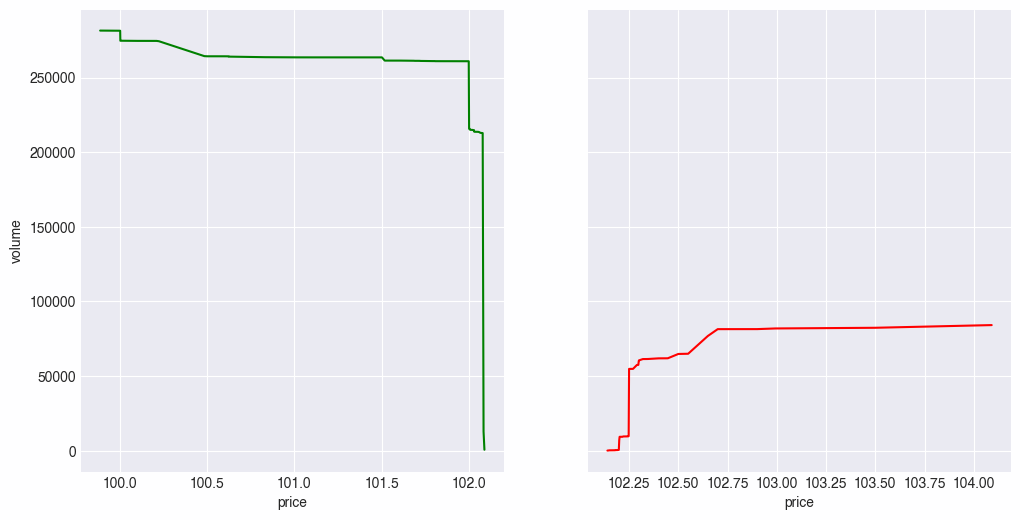

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6), sharey=True)
l2_bid_orderbook["value_cumsum"].plot(ax=axes[0],kind = "line", ylabel = "volume", color = "Green")
l2_ask_orderbook["value_cumsum"].plot(ax=axes[1], kind = "line", color = "Red")